**Imports the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

**Imports the csv file into a panda dataframe**

In [2]:
df = pd.read_csv("Churn/Churn_Modelling.csv")

**Assigns the dataframe to target and features**

In [3]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

**Label encoding to process the columns with strings into integers**

In [6]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Under samples the dominant class type**

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

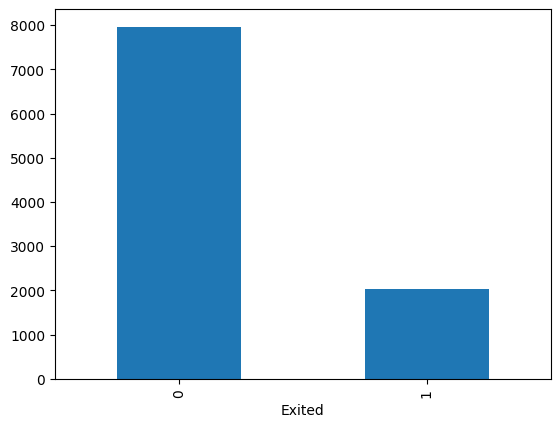

In [9]:
df.Exited.value_counts().plot(kind="bar")
plt.show()

In [10]:
under_sampler = RandomUnderSampler(random_state=9)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)


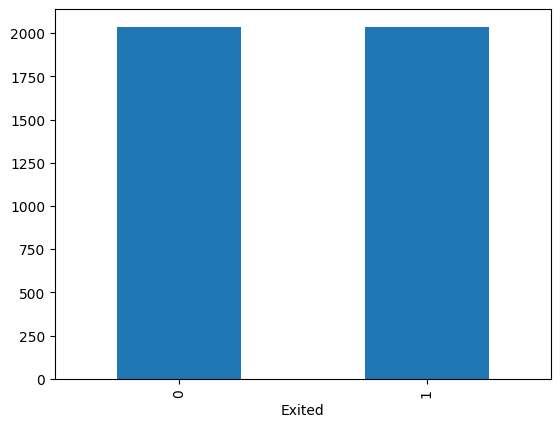

In [11]:
y_resampled.value_counts().plot(kind="bar")
plt.show()

In [12]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name="Exited")

df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [13]:
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
df_stripped = df.drop(columns_to_drop, axis=1)
df_features = df_stripped.drop("Exited", axis=1)

**Creates histograms to check the distribution of data**

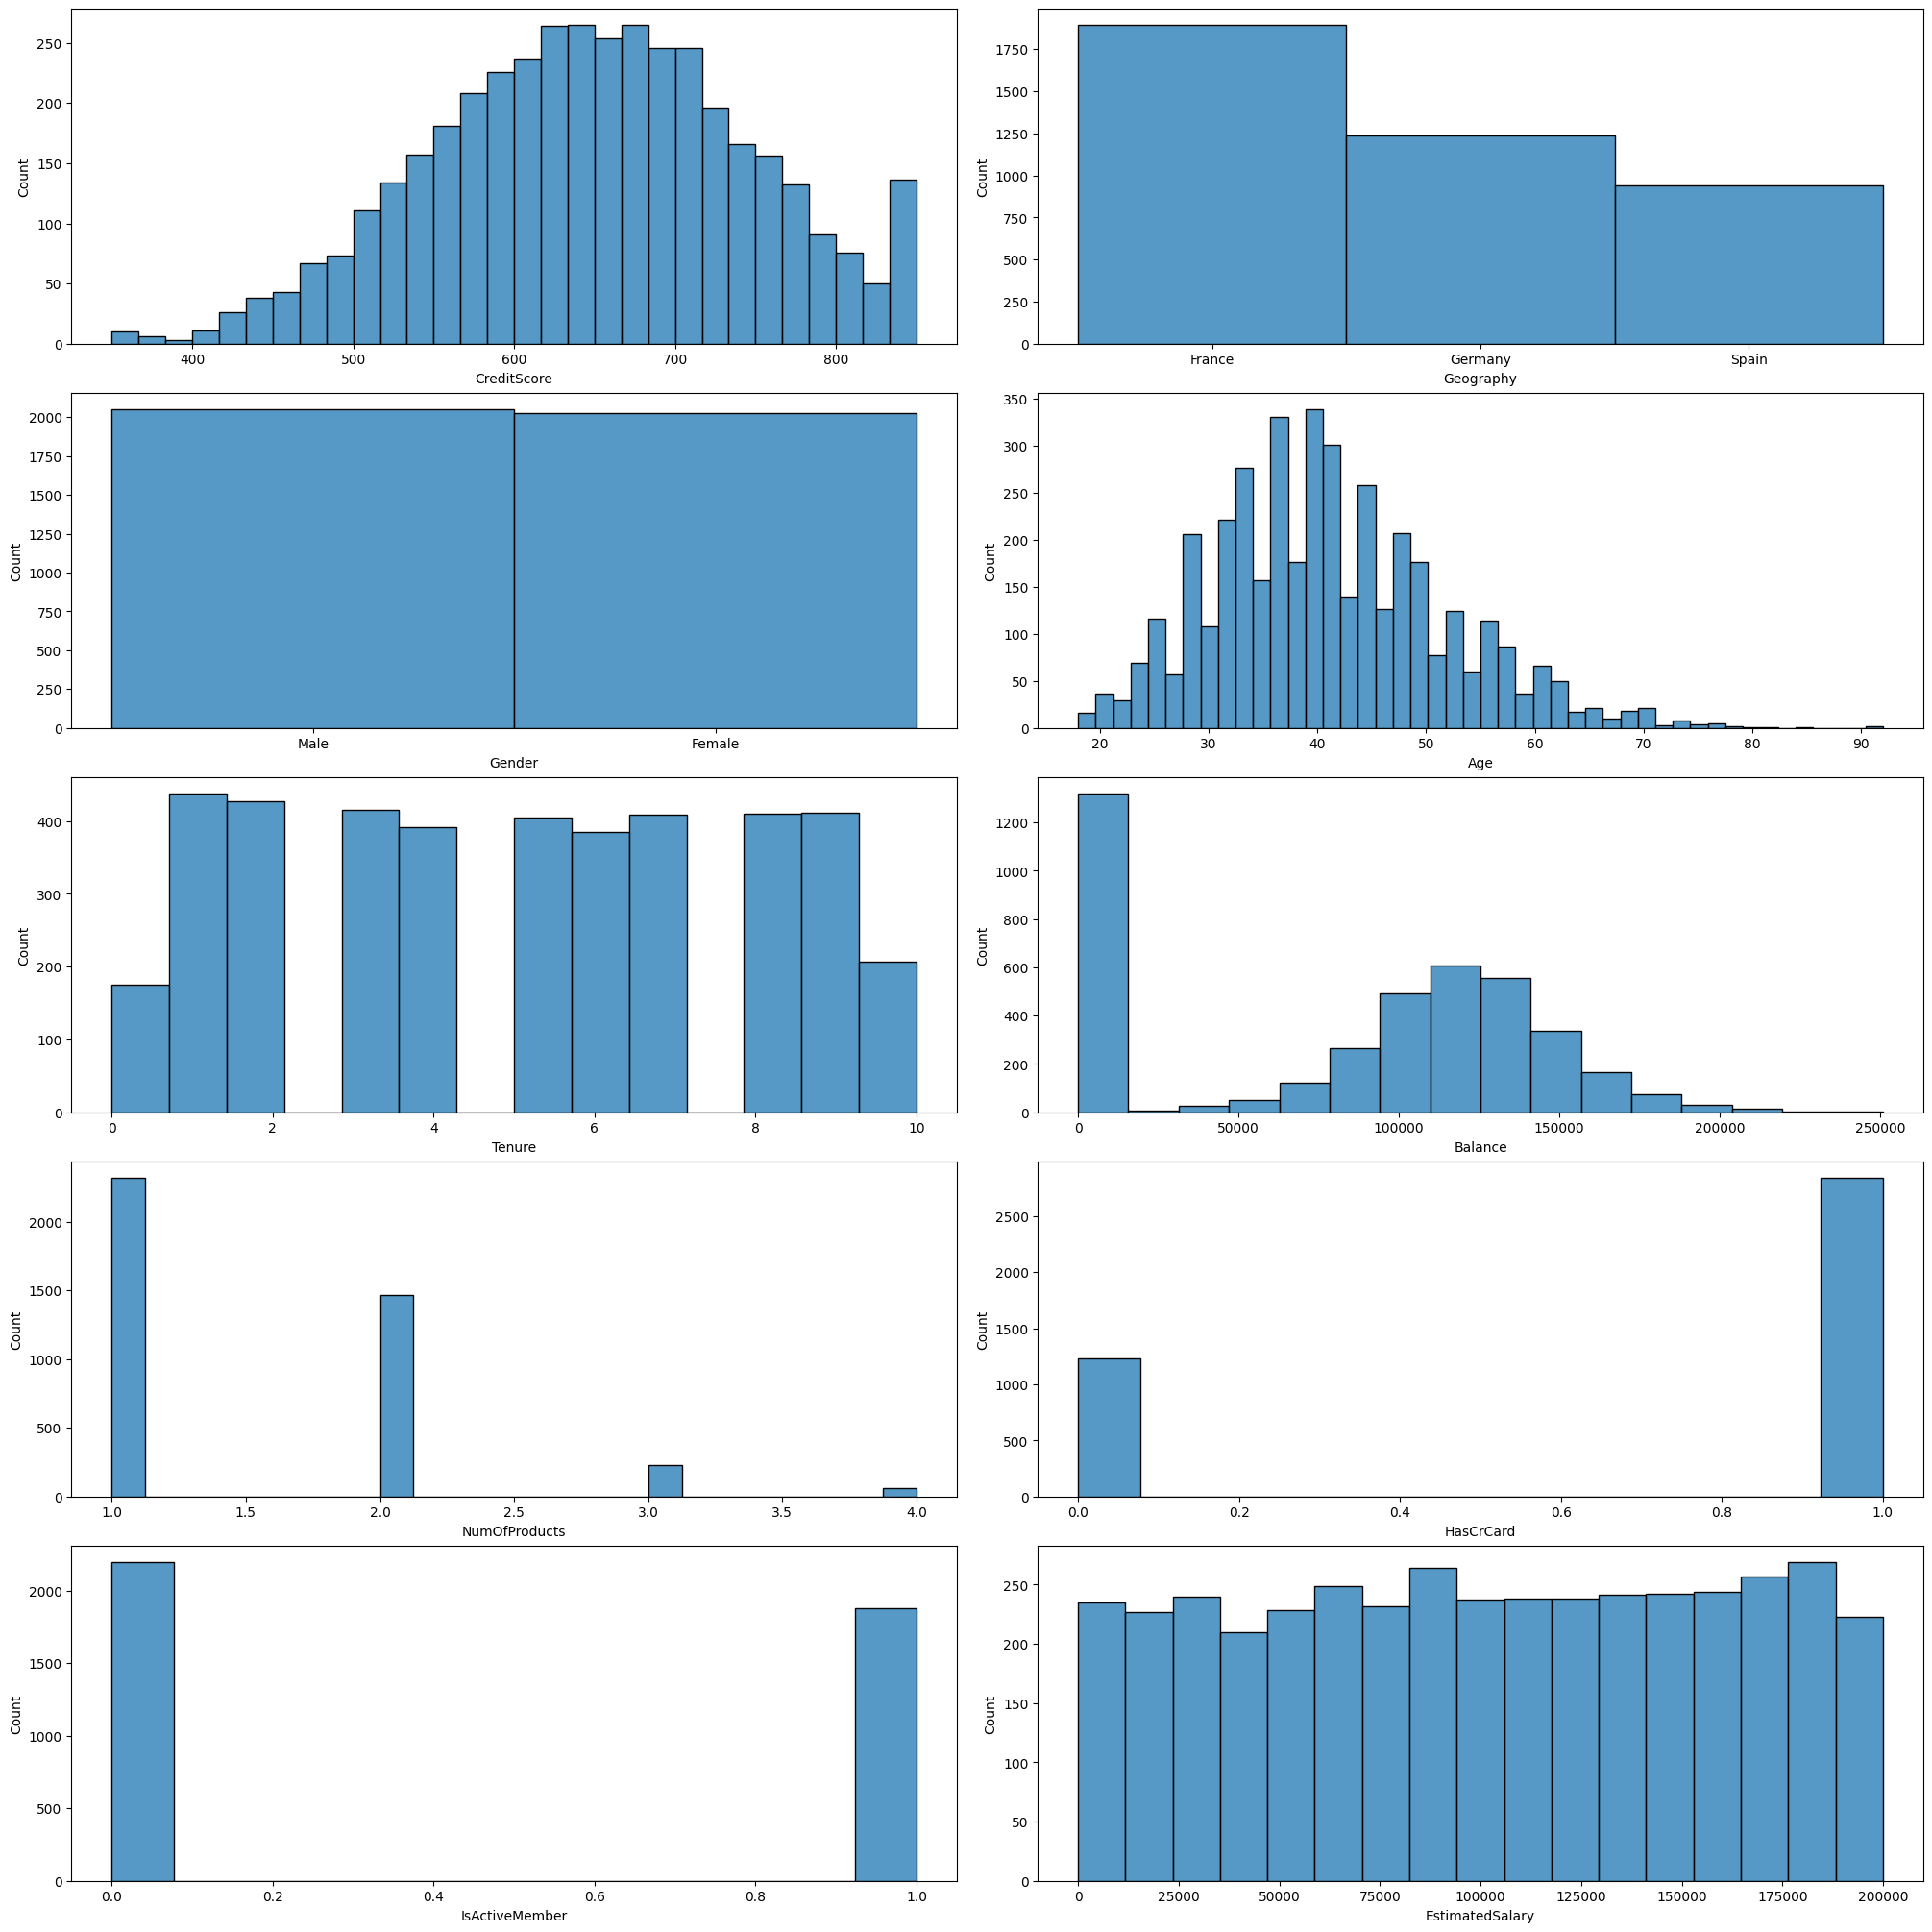

In [14]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.histplot(df[column], ax=axes[i,j])
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

**Checks the distribution of data between the binary classifications**

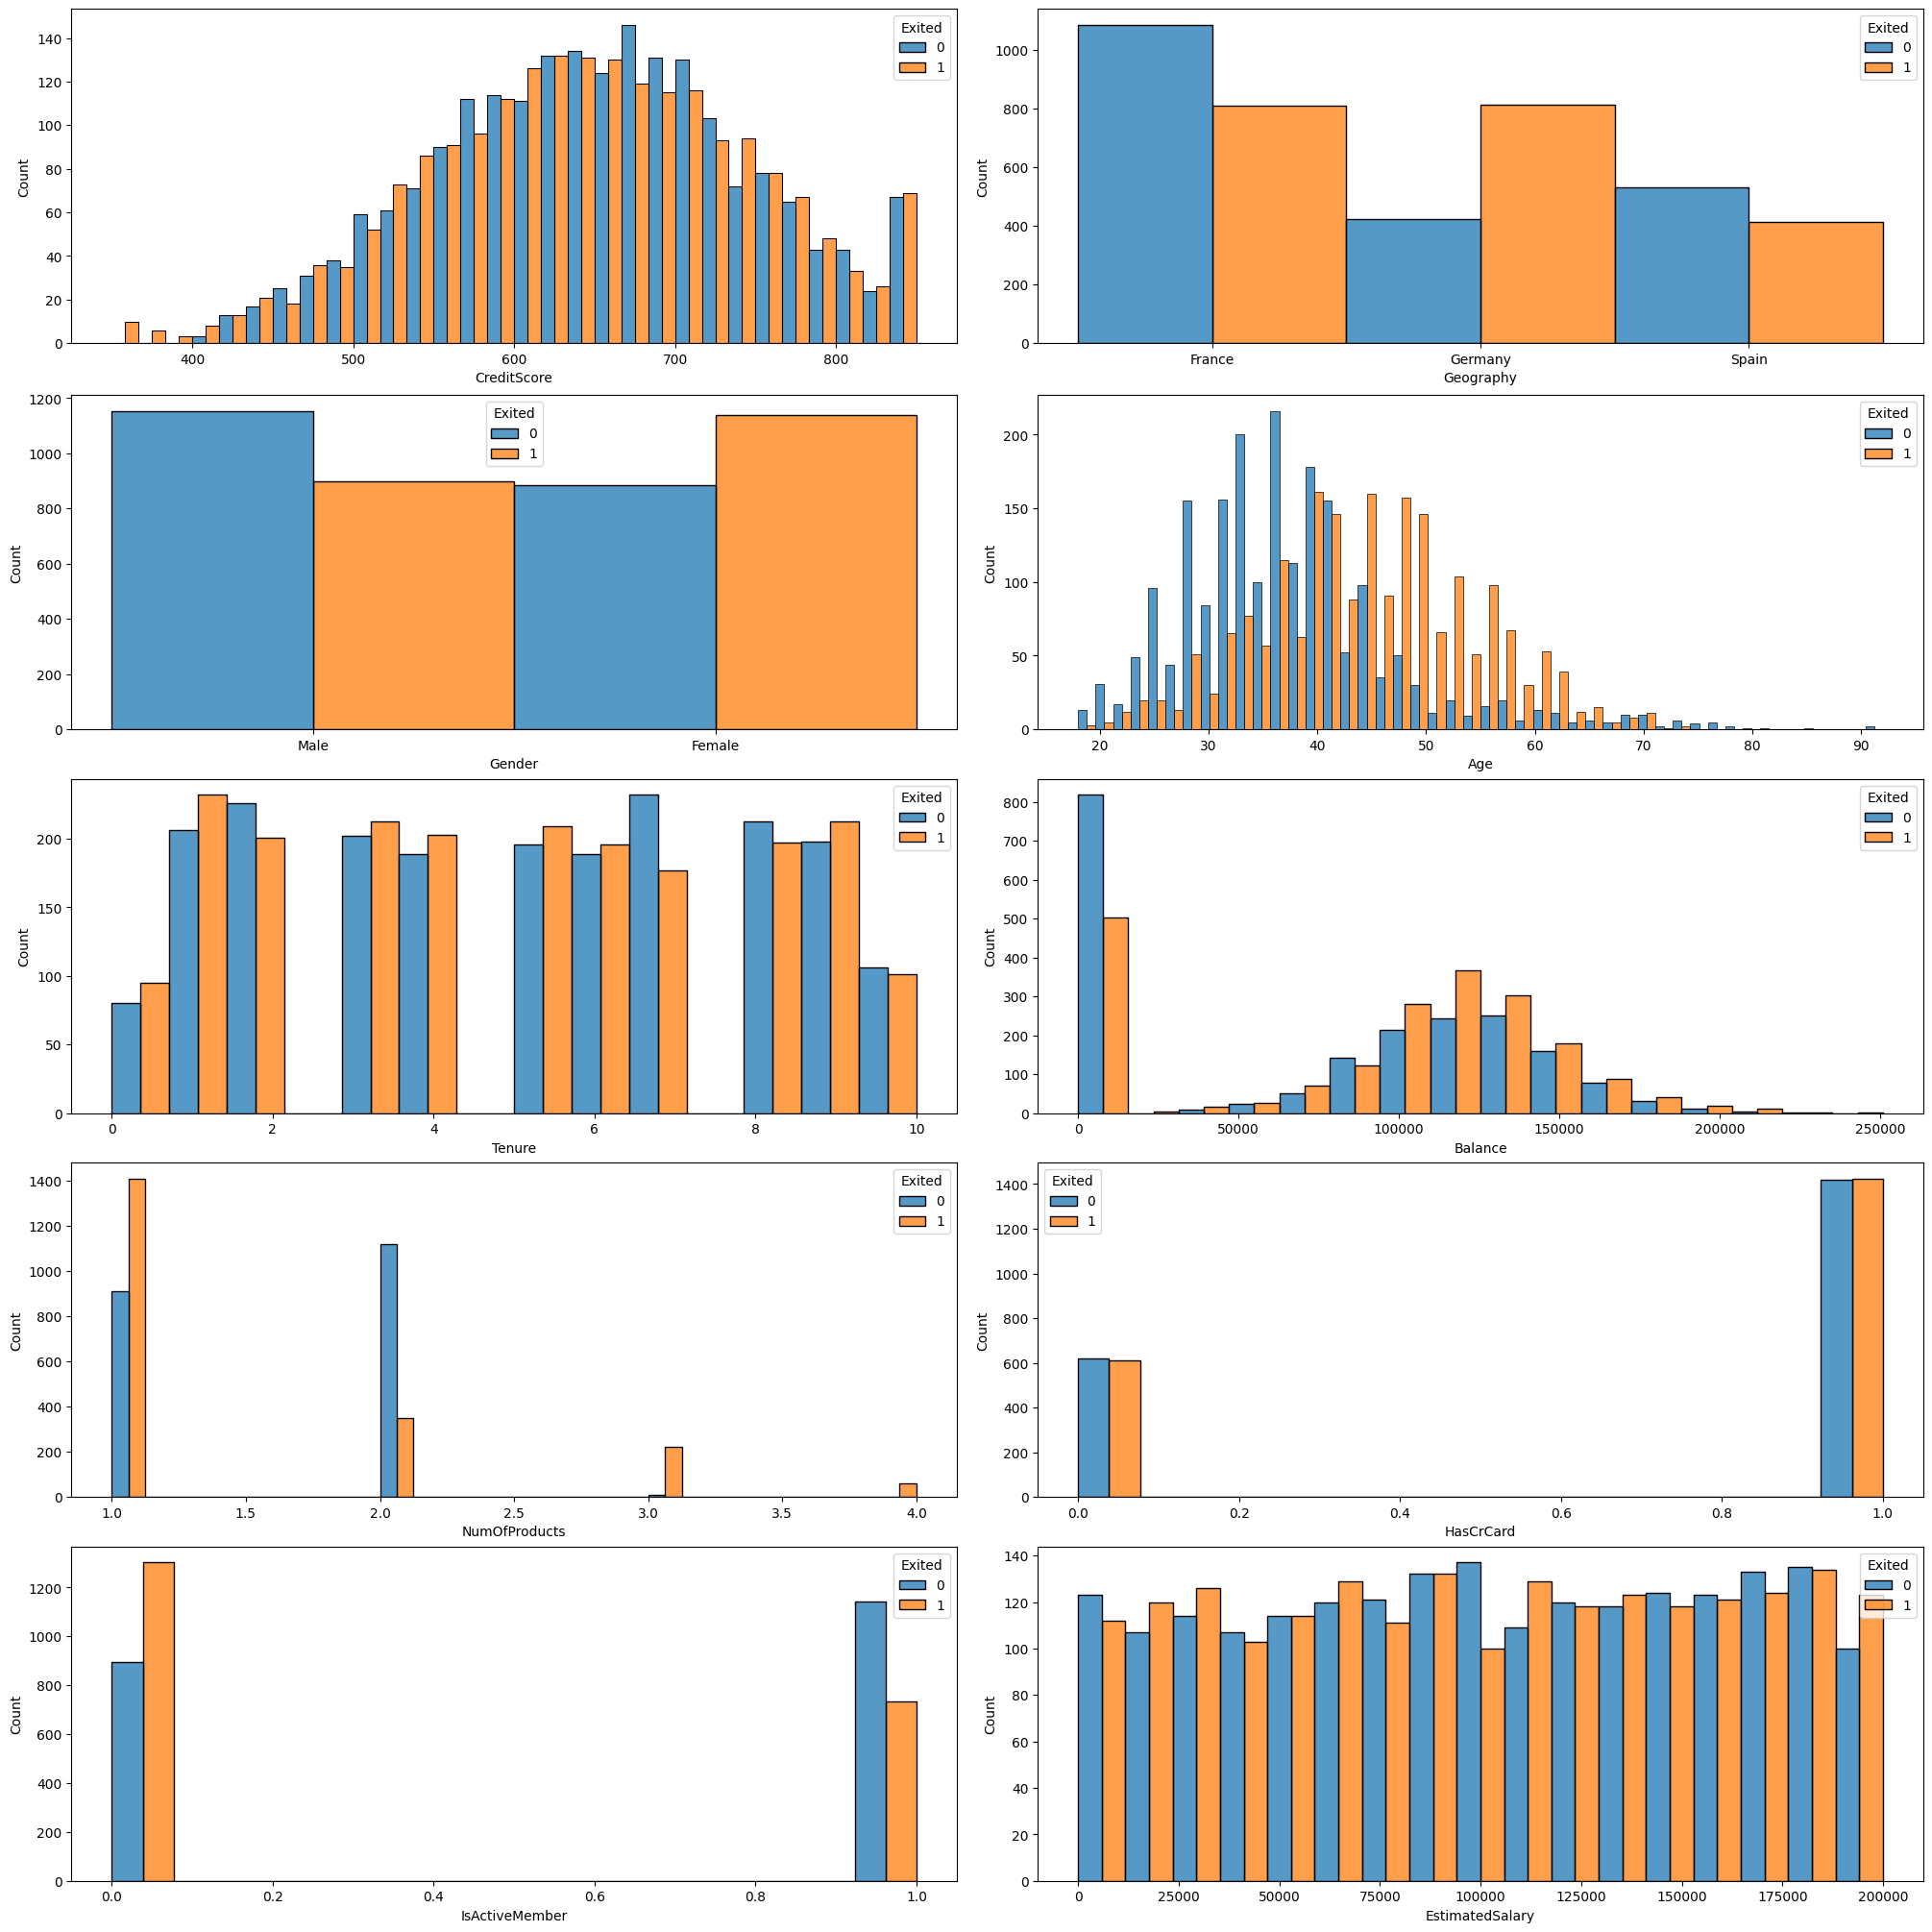

In [15]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.histplot(data=df, x=column, hue="Exited", ax=axes[i,j], multiple="dodge")
    
    
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

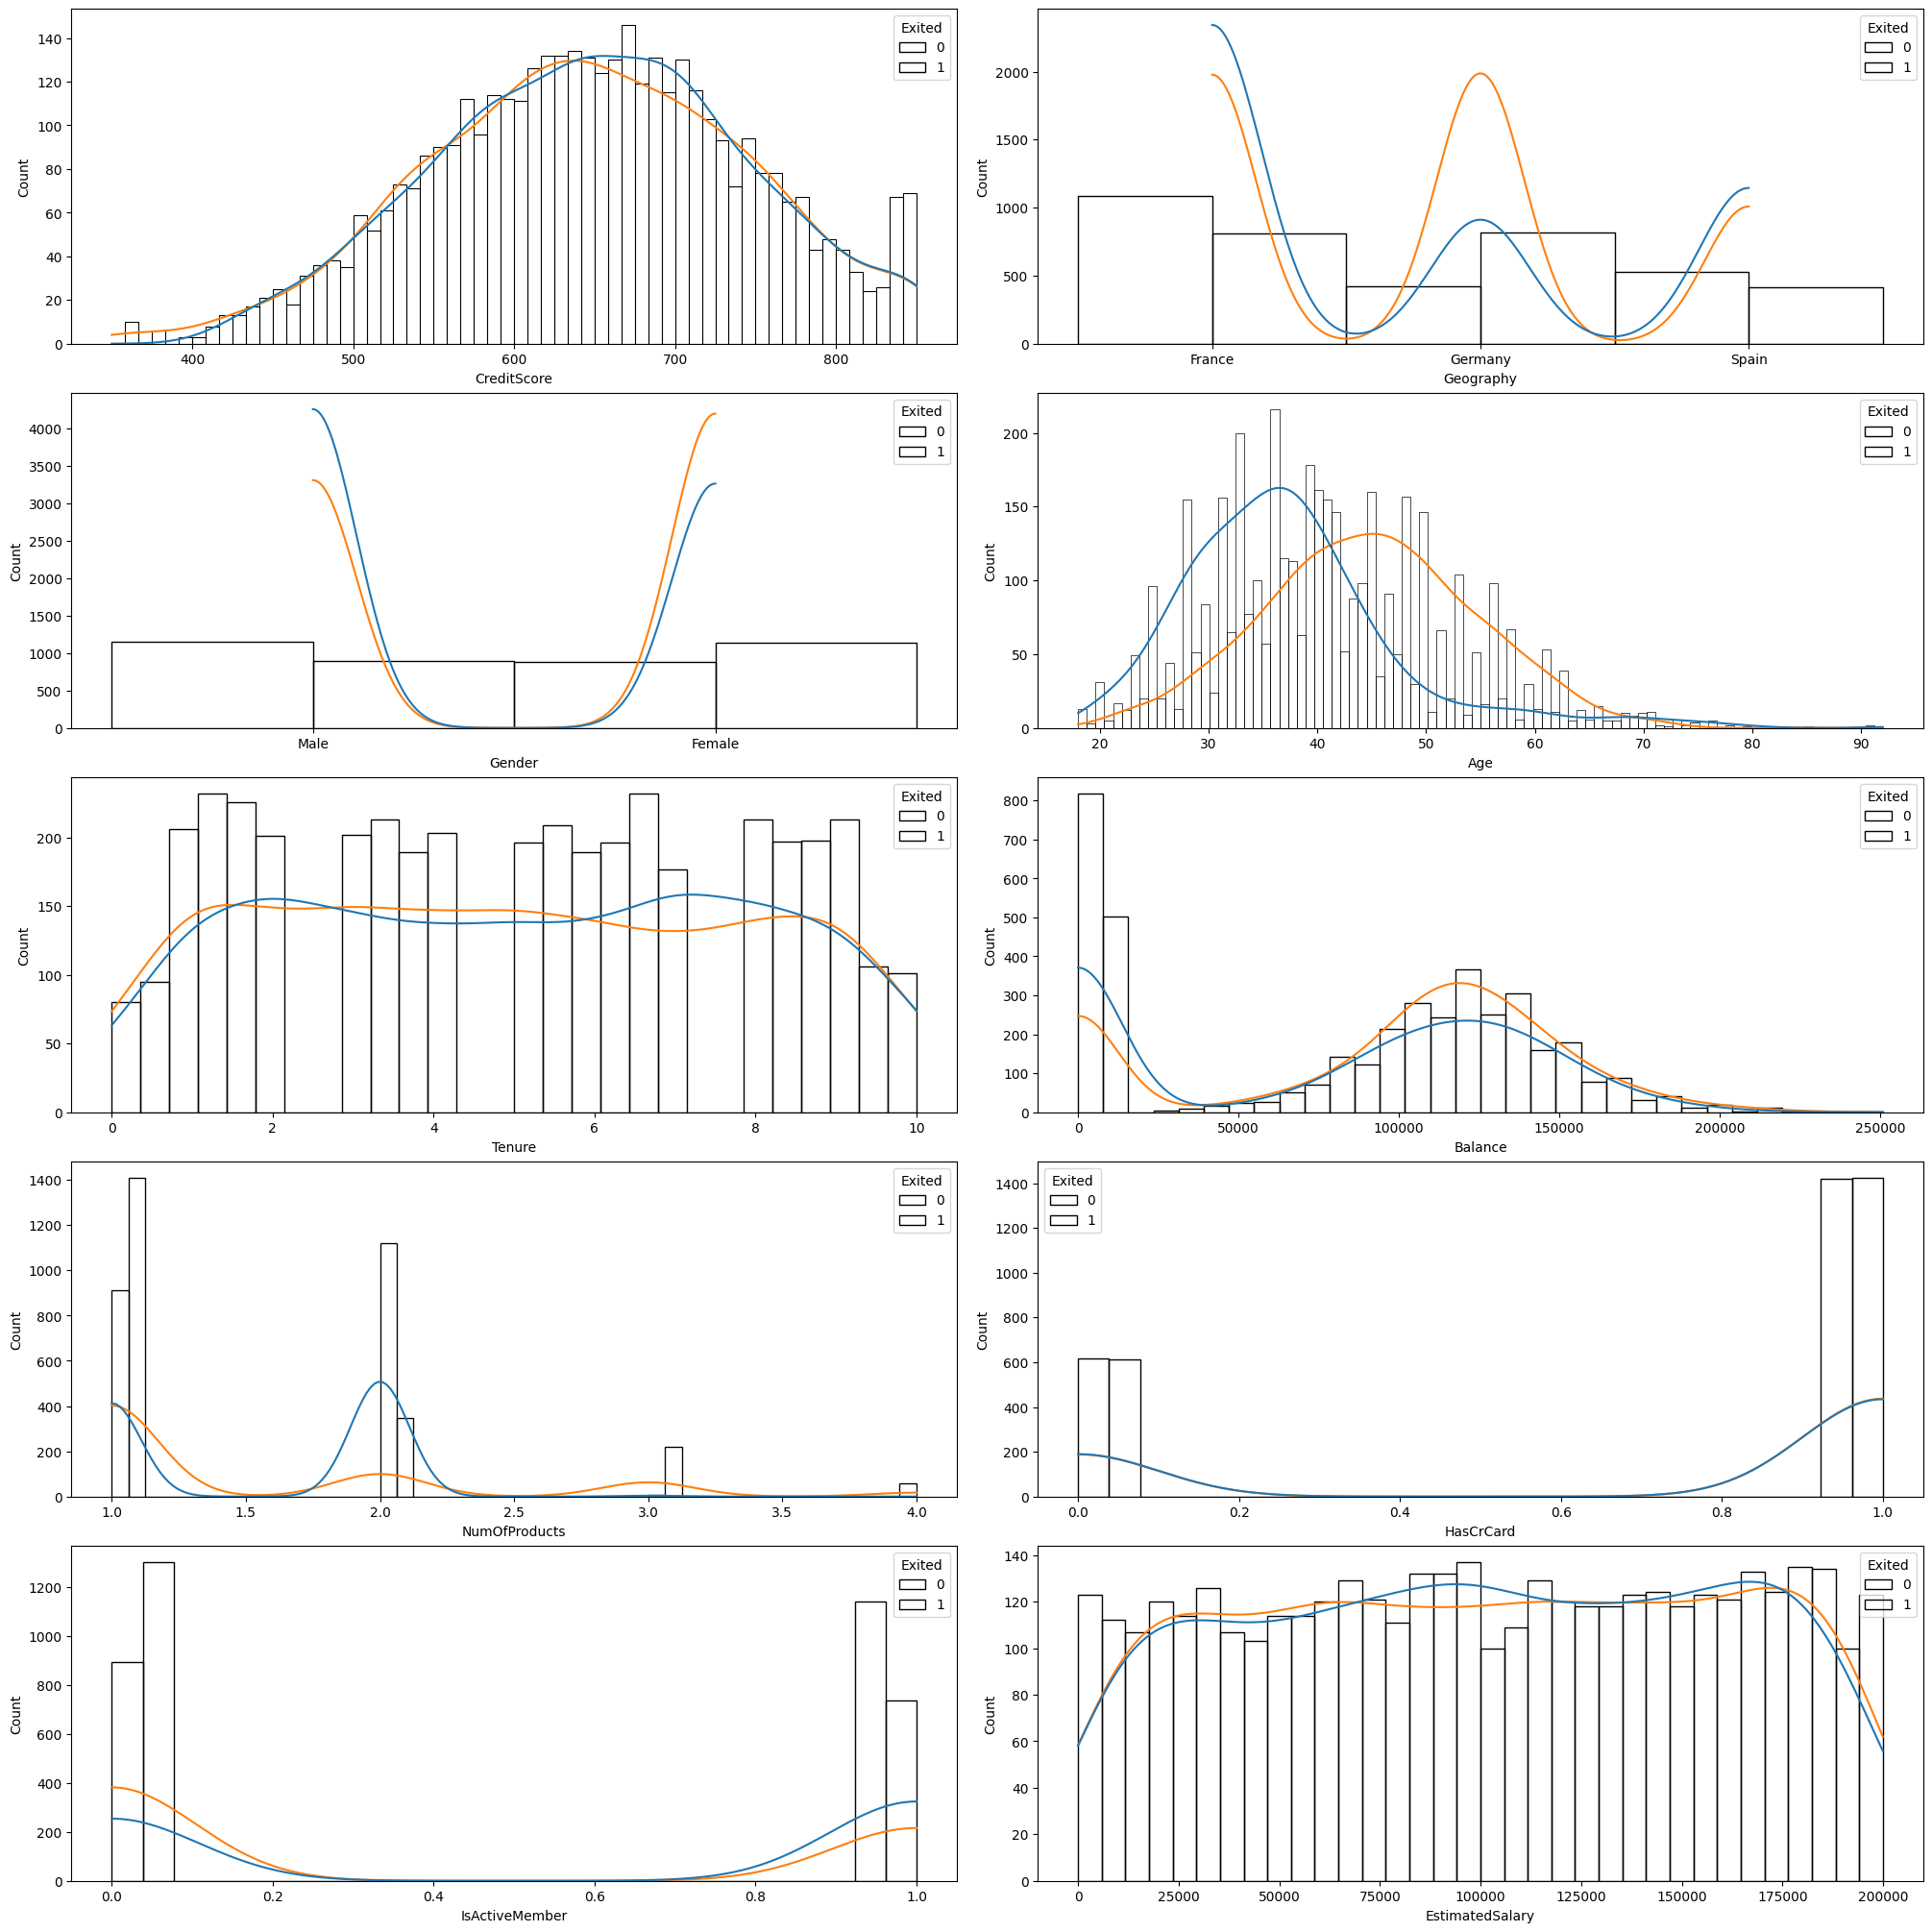

In [16]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.histplot(data=df, x=column, hue="Exited", ax=axes[i,j], multiple="dodge", kde=True, alpha=0)
    
    
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

**Converts the columns with strings into numbers**

In [17]:
label_encoder = LabelEncoder()
df_stripped['Geography'] = label_encoder.fit_transform(df_stripped['Geography'])
df_stripped["Gender"] = label_encoder.fit_transform(df_stripped["Gender"])

**Another way of identifying what factors effect churn**

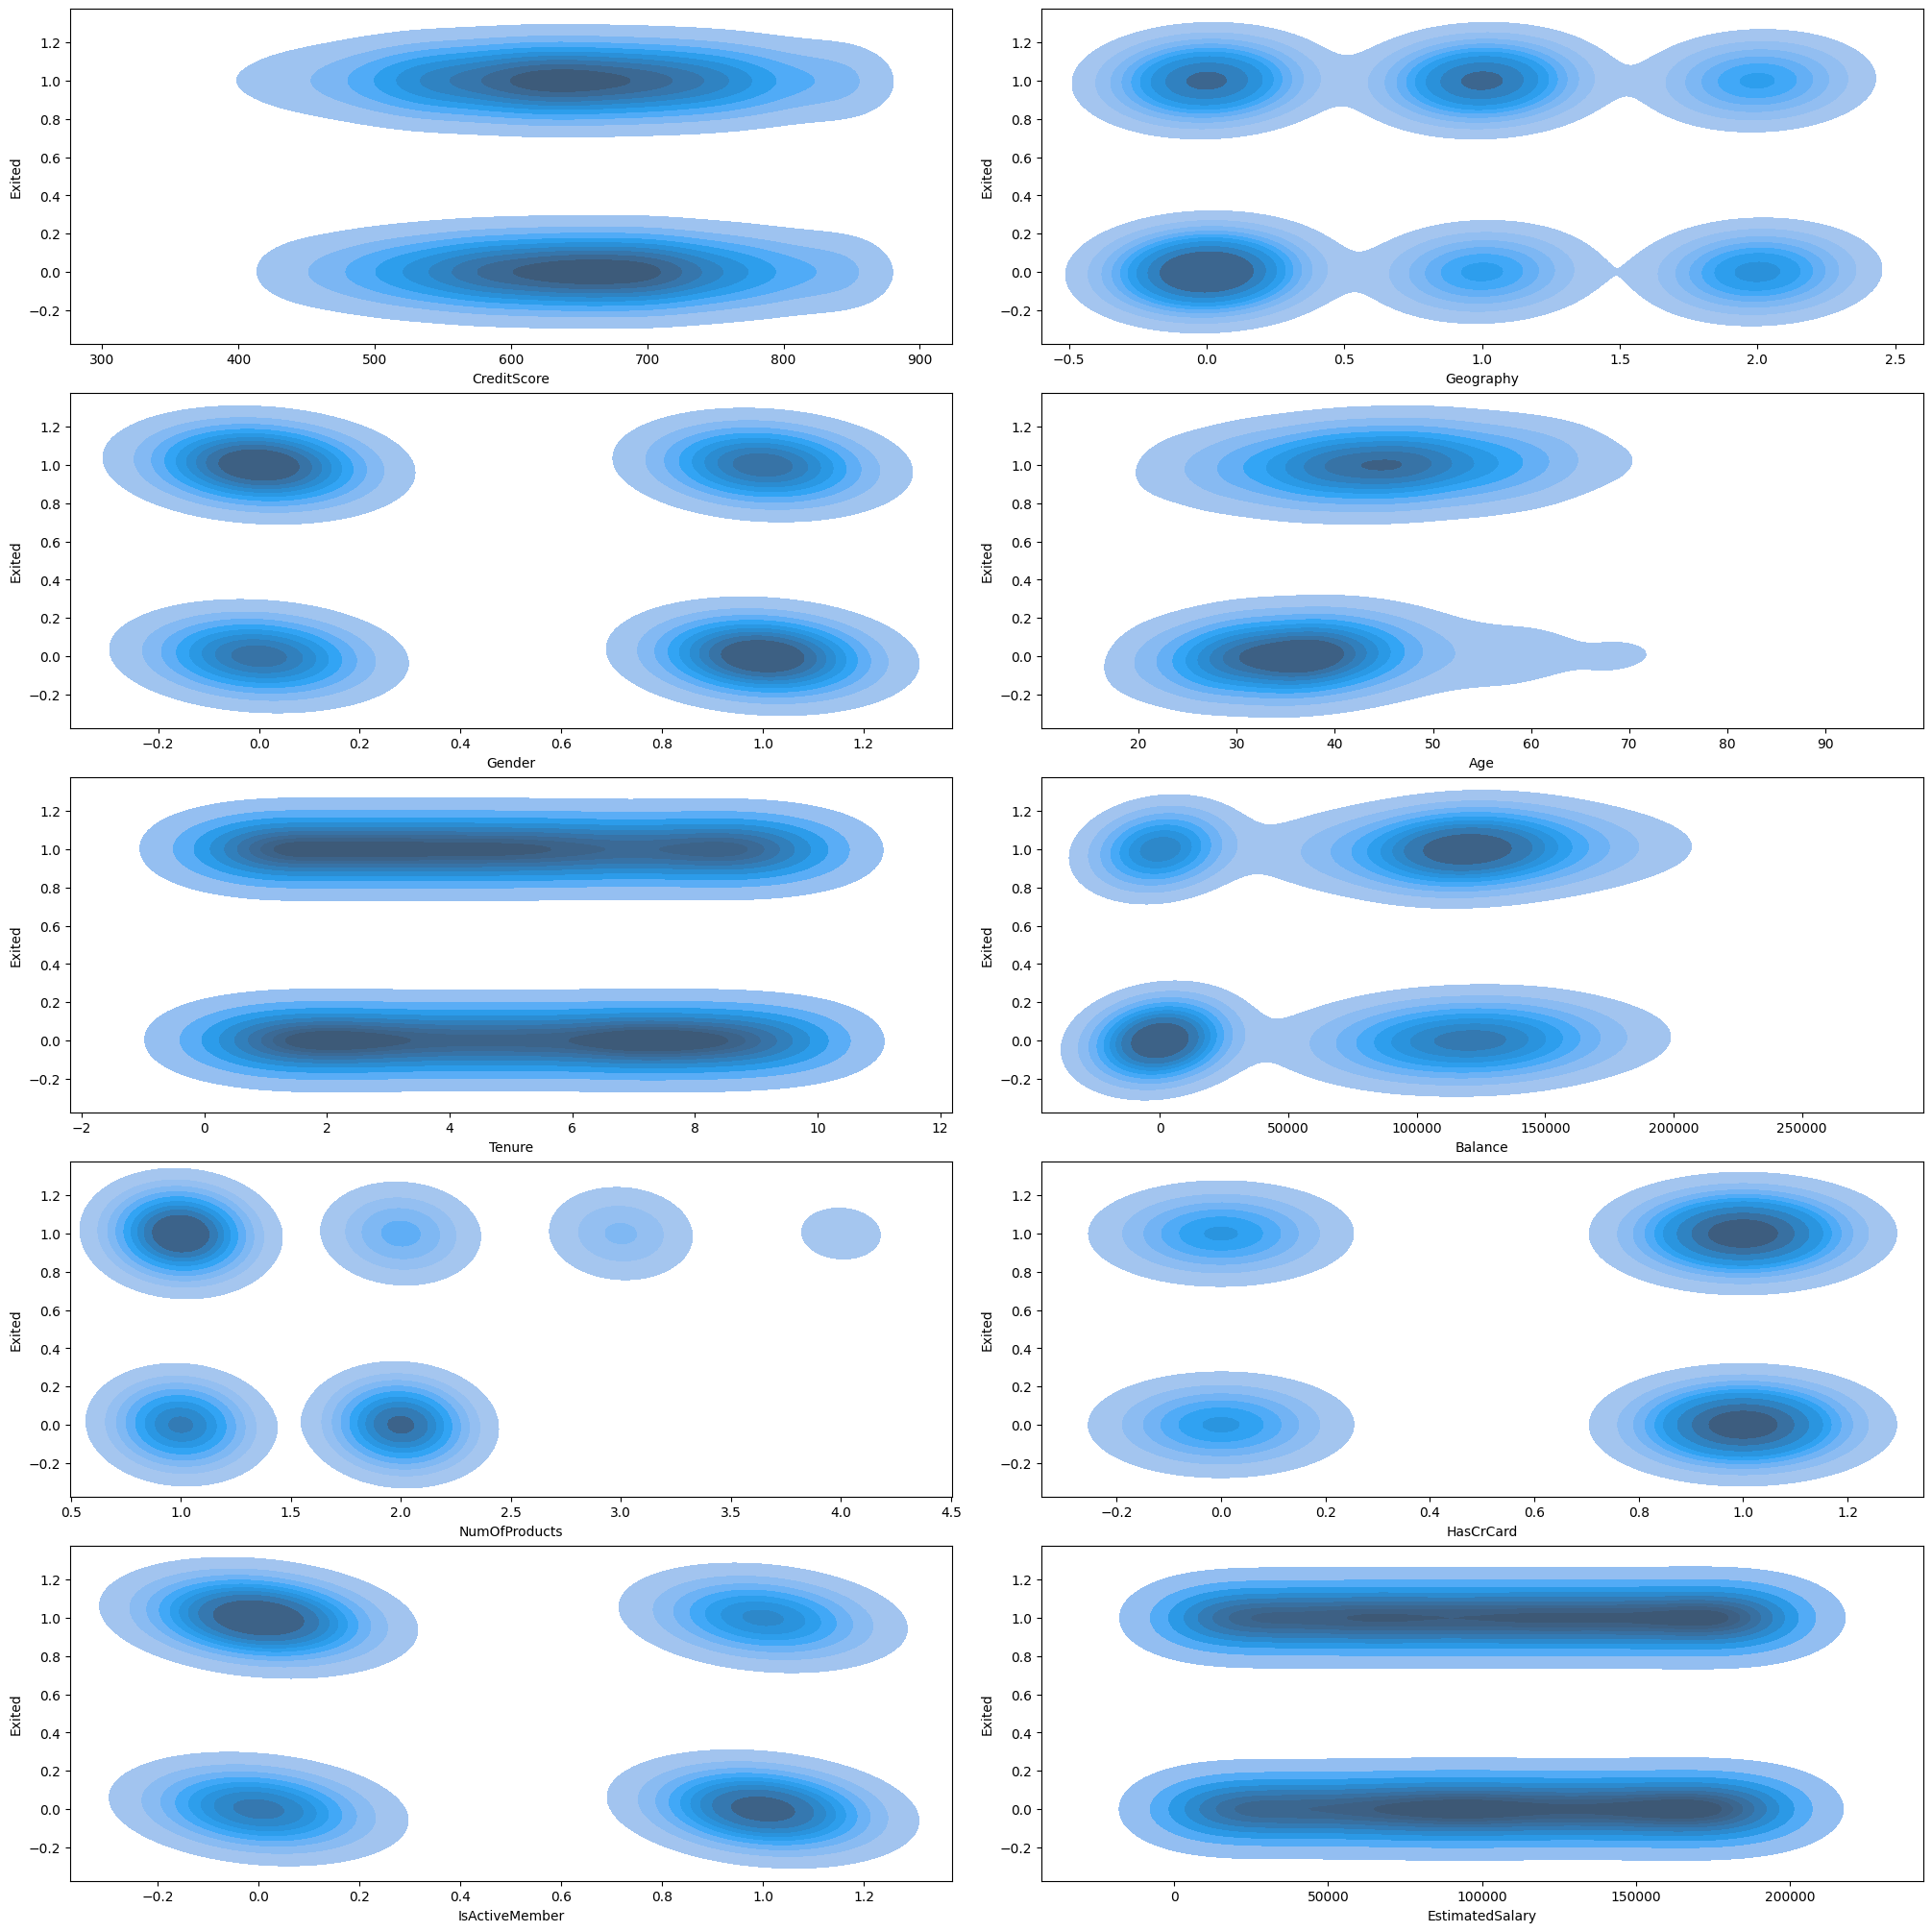

In [18]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.kdeplot(data=df_stripped, x=df_stripped[column], y=df_stripped["Exited"],fill=True, ax=axes[i, j])

    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

**Creates a correlation heatmap to check for Multicollinearity**

<function matplotlib.pyplot.show(close=None, block=None)>

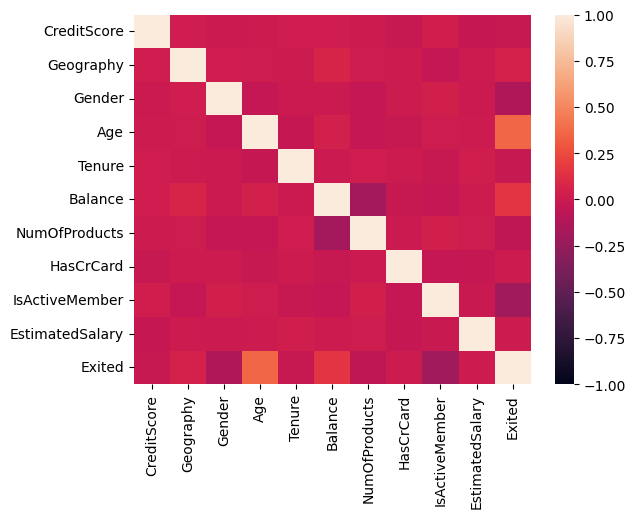

In [19]:
corr_matrix = df_stripped.corr()
sns.heatmap(corr_matrix, annot=False, vmin=-1, vmax=1)
plt.show